In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
dfucb = [
    pd.read_table("params/N6/simulation_params_N6C0.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C0.01.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C0.05.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    #pd.read_table("params/N4/simulation_params_N4C0.08.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C0.1.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C0.3.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C0.5.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    #pd.read_table("params/N4/simulation_params_N4C0.7.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N6/simulation_params_N6C1.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
]

In [80]:
plot_folder = "plots/data_distribution/N6/"

In [81]:
dfucb[0]

,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.276796,0.227115,0.069682,0.057175,0.264160,0.0,0.333333,1.333333,0.639293,6.858396e-07,0.3335
1,0.249119,0.249582,0.083141,0.083295,0.166667,0.0,0.500000,0.500000,0.500000,1.349813e-07,0.5000
2,0.000116,0.000163,0.055556,0.078567,0.000000,0.0,1.000000,0.000000,0.000000,-5.888137e-08,0.0000
3,0.332863,0.133944,0.097499,0.039234,0.467892,0.0,0.142857,3.166667,0.783586,2.560965e-07,0.4285
4,0.000404,0.000835,0.048611,0.100395,0.000000,0.0,1.000000,0.000000,0.000000,-3.009581e-07,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
596,-0.000058,0.000926,-0.005556,0.089062,0.000000,0.0,1.000000,0.000000,0.000000,-3.337333e-07,0.0000
597,0.290518,0.170858,0.097143,0.057131,0.333333,0.0,0.250000,1.666667,0.662006,3.102414e-07,0.5000
598,0.249133,0.143438,0.083391,0.048012,0.333333,0.0,0.250000,2.500000,0.641620,2.694569e-07,0.2500
599,0.497169,0.286874,0.083324,0.048079,0.166667,0.0,0.500000,0.666667,0.999500,6.487360e-07,1.0000


In [121]:
#for d in df:
#    d['efficiency'].describe()

In [82]:
Cs = [0,0.01,0.05,0.1,0.3,0.5,1.0]#[0,0.01,0.05,0.08,0.1,0.3,0.5,0.7,1.0]

In [84]:
#To bypass a bug in _define_bin_edges, _statistics.py, that generates an error in bins 
if dfucb[0]['cond_entropy'].sum() == 0:
    dfucb[0].loc[0,'cond_entropy'] = 1.e-1
#dfucb[0]

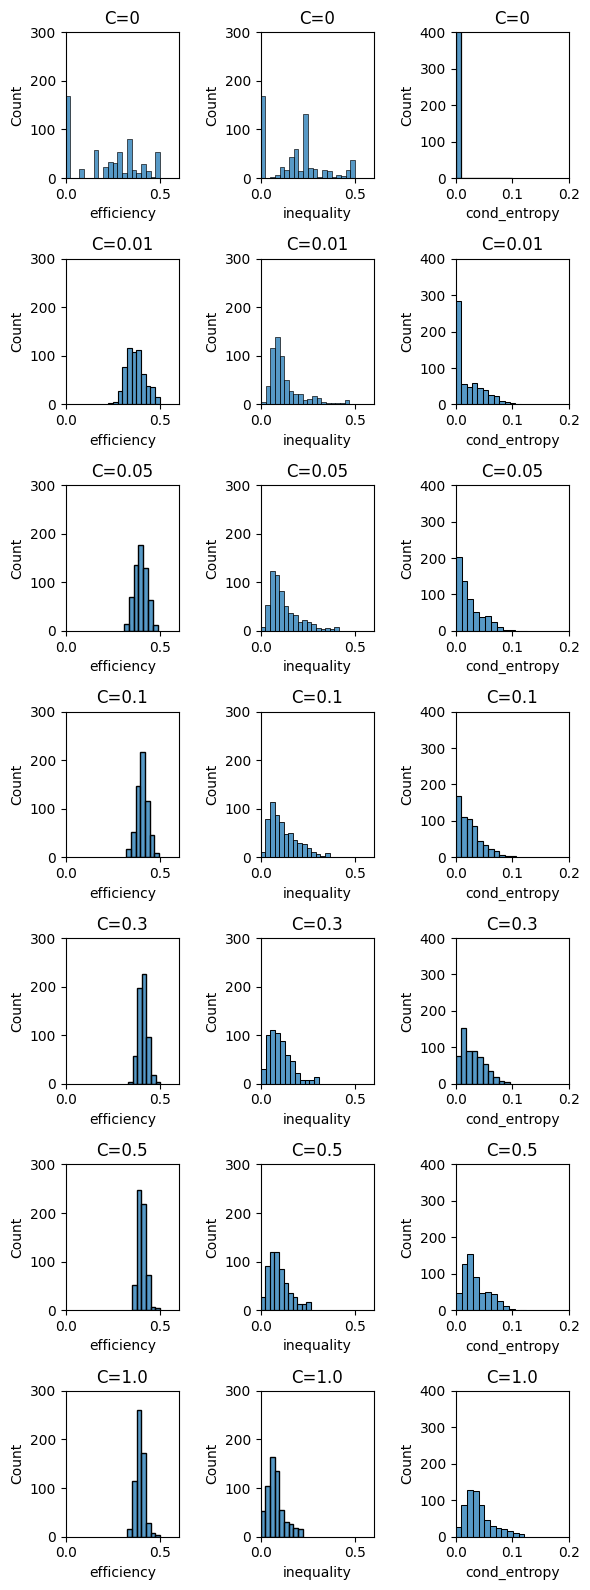

In [85]:
nr = len(dfucb)
nc = 3
fig0, ax = plt.subplots(nrows=nr,ncols=nc,figsize=(6,16))
for i in range(0,len(dfucb)):
    pa = sns.histplot(data=dfucb[i], ax=ax[i,0], x='efficiency', binwidth=0.025)
    pb = sns.histplot(data=dfucb[i], ax=ax[i,1], x='inequality', binwidth=0.025)
    pc = sns.histplot(data=dfucb[i], ax=ax[i,2], x='cond_entropy', binwidth=0.01)
    pa.set_title('C='+str(Cs[i]))
    pb.set_title('C='+str(Cs[i]))
    pc.set_title('C='+str(Cs[i]))
    pa.set_xlim(0,0.6)
    pa.set_ylim(0,300)
    pb.set_xlim(0,0.6)
    pb.set_ylim(0,300)
    pc.set_xlim(0,0.2)
    pc.set_ylim(0,400)
plt.tight_layout()
plt.savefig(plot_folder+'histograms.png')

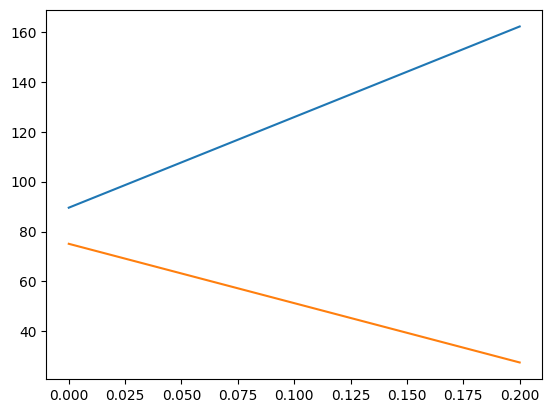

In [124]:
cvals = [0,0.2] 
eff_means = [d.efficiency.mean() for d in dfucb]
inq_means = [d.inequality.mean() for d in dfucb]
plt.plot(cvals,eff_means)
plt.plot(cvals,inq_means)